In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from scipy.optimize import curve_fit
import scipy.io
from PIL import Image
from pylab import *
import pandas as pd

In [2]:
## Parameter exploration
hc_exploration = np.load("hc_exploration.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


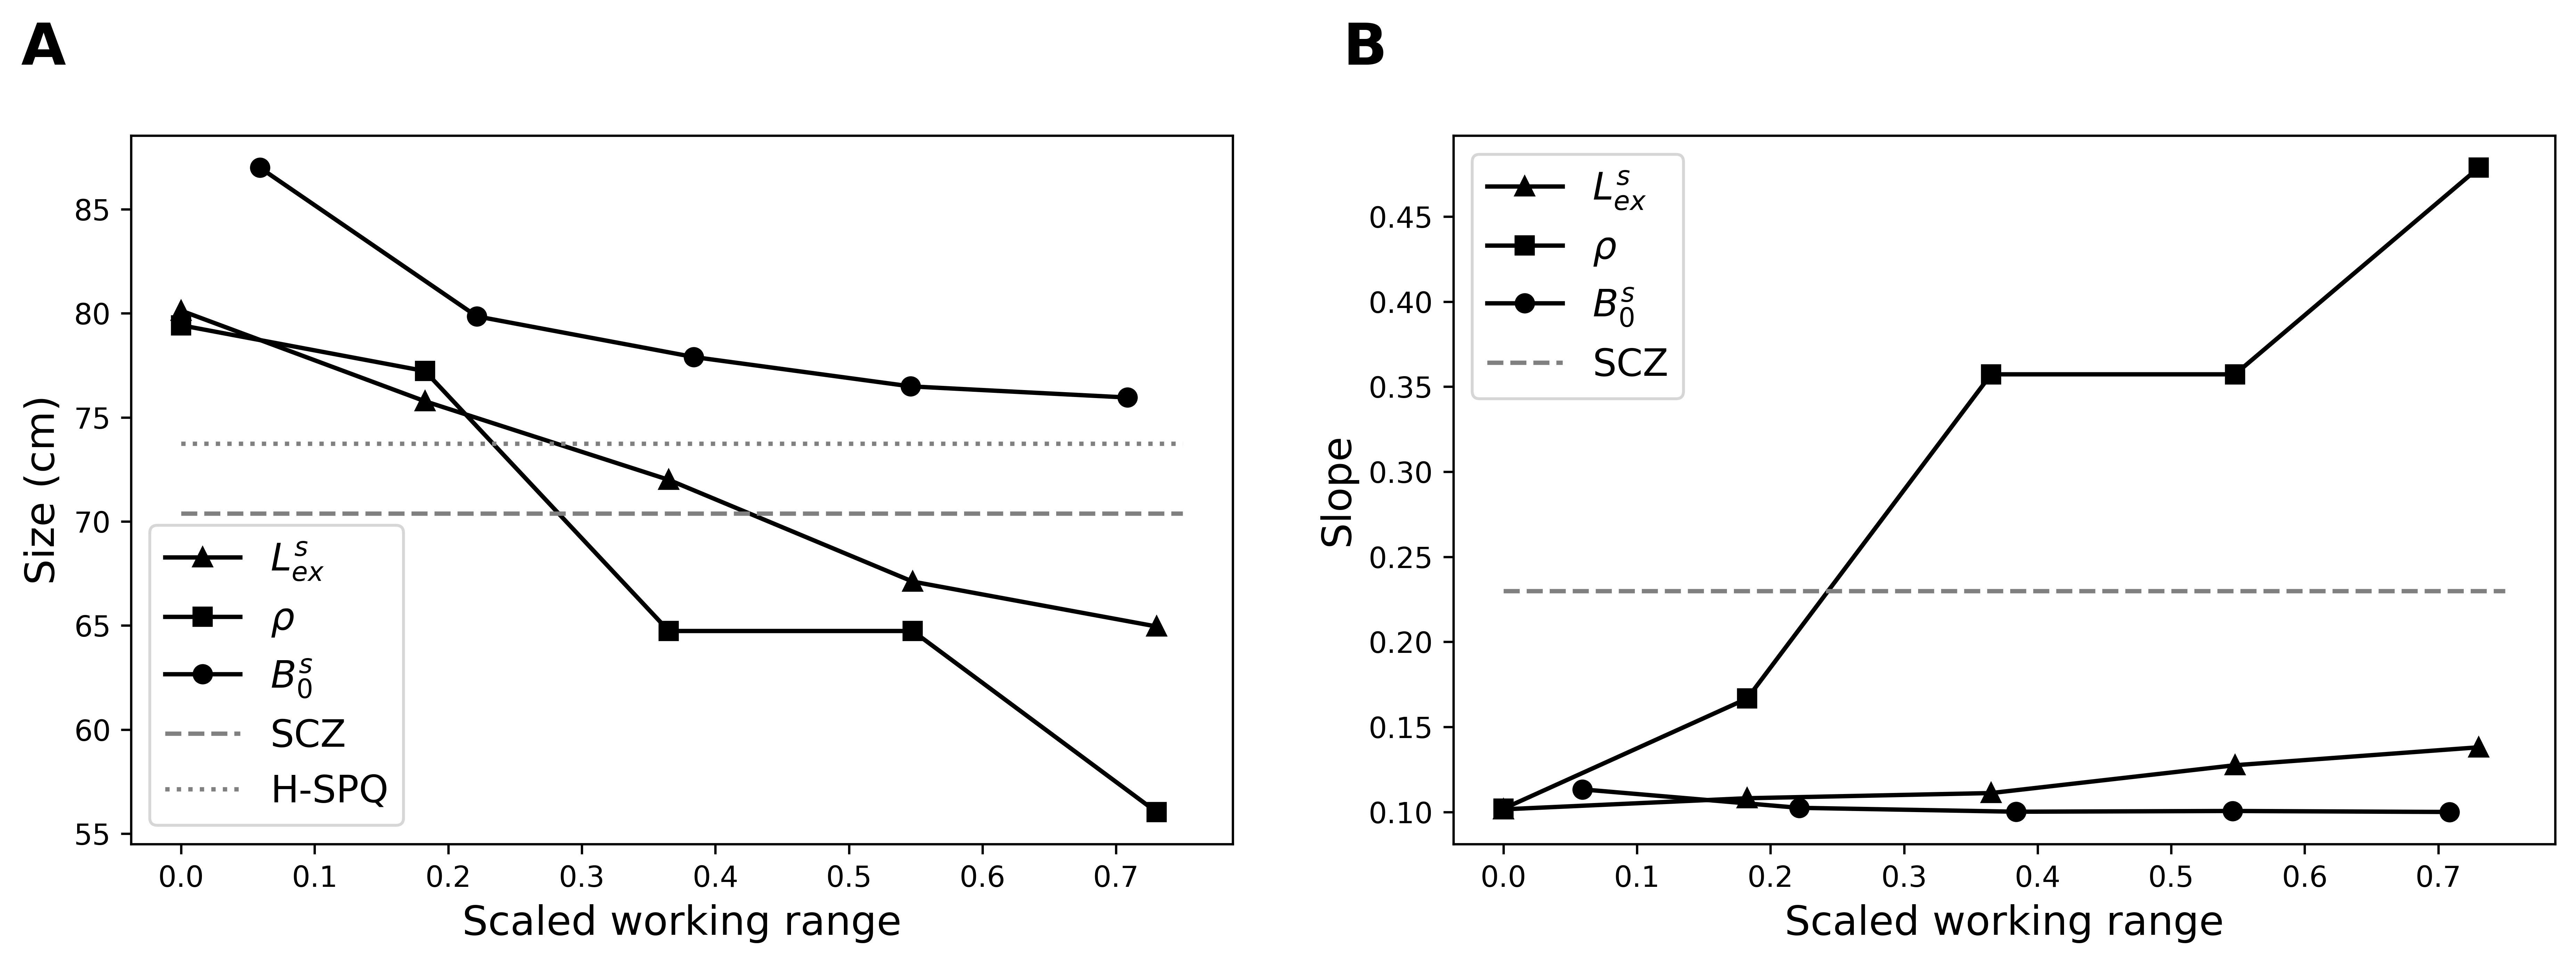

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5), dpi=600)
# colors = ['0', '.4', '.6', '.8', '.8']
size = 5

ax1 = plt.subplot(121)
ax1.plot(
    hc_exploration[0], hc_exploration[1], label=r"$L_{ex}^{s}$", color="k", marker="^"
)
ax1.plot(hc_exploration[3], hc_exploration[4], label=r"$\rho$", color="k", marker="s")
ax1.plot(
    hc_exploration[6], hc_exploration[7], label=r"$B_{0}^{s}$", color="k", marker="o"
)
ax1.plot(
    np.linspace(0, 0.75, size), np.repeat(70.38, size), "--", label="SCZ", color="0.5"
)
ax1.plot(
    np.linspace(0, 0.75, size), np.repeat(73.75, size), ":", label="H-SPQ", color="0.5"
)
ax1.set_ylabel("Size (cm)", size=14)
ax1.set_xlabel("Scaled working range", size=14)
leg = ax1.legend(fontsize=13)
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(122)
ax2.plot(
    hc_exploration[0],
    1 / hc_exploration[2],
    label=r"$L_{ex}^{s}$",
    color="k",
    marker="^",
)
ax2.plot(
    hc_exploration[3], 1 / hc_exploration[5], label=r"$\rho$", color="k", marker="s"
)
ax2.plot(
    hc_exploration[6],
    1 / hc_exploration[8],
    label=r"$B_{0}^{s}$",
    color="k",
    marker="o",
)
ax2.plot(
    np.linspace(0, 0.75, size), np.repeat(0.23, size), "--", label="SCZ", color="0.5"
)
ax2.set_ylabel("Slope", size=14)
ax2.set_xlabel("Scaled working range", size=14)
leg = ax2.legend(fontsize=13)
ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

# fig.subplots_adjust(wspace=0.25)
fig.savefig("Results/FIG2.eps", bbox_inches="tight", format="eps")

In [5]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True)

# restore np.load for future normal usage
# np.load = np_load_old

In [6]:
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 7)
v = 30  # cm/s
a_distances = 120 - ts * v
a_distances_exp = np.linspace(a_distances[0], a_distances[-1], 30)

hc = np.load("hc.npy")
scz_lex = np.load("scz_lex.npy")
scz_pr = np.load("scz_pr.npy")
scz_lex_pr = np.load("scz_lex_pr.npy")
spq_lex = np.load("spq_lex.npy")
spq_pr = np.load("spq_pr.npy")

In [31]:
### Load experimental data (Di Cosmo et al., 2017)

HCdata = pd.read_excel(r"PPS_data_SCZ_SPQ.xlsx", sheet_name="HC")
SCZdata = pd.read_excel(r"PPS_data_SCZ_SPQ.xlsx", sheet_name="SCZ")
SPQdata = pd.read_excel(r"PPS_data_SCZ_SPQ.xlsx", sheet_name="high spq")
LSPQdata = pd.read_excel(r"PPS_data_SCZ_SPQ.xlsx", sheet_name="low spq")

sets = [HCdata, SCZdata, SPQdata, LSPQdata]
RTdata = []

for i in sets:
    subjects = i["Subject"].unique()
    delays = i[(i["Sound"] == "Loom") & (i["Cond"] != "Loom_NO")]["Cond"].unique()
    delays = np.delete(delays, np.where(delays == "Loom_-700")[0])
    idx = [3, 4, 0, 1, 2]
    delays = delays[idx]
    RTs = []

    for s in subjects:
        meanRTs = []
        for t in delays:
            RT = i[(i["Subject"] == s) & (i["Cond"] == t)]["Rtpul"]
            meanRTs.append(np.mean(RT))
        RTs.append(meanRTs)
    RTdata.append(RTs)

HC_RTs = np.asarray(RTdata[0])
SCZ_RTs = np.asarray(RTdata[1])
SPQ_RTs = np.asarray(RTdata[2])
LSPQ_RTs = np.asarray(RTdata[3])

ts2 = np.linspace(s_distances[0], s_distances[-1], 5)
a_distances2 = 120 - ts2 * v

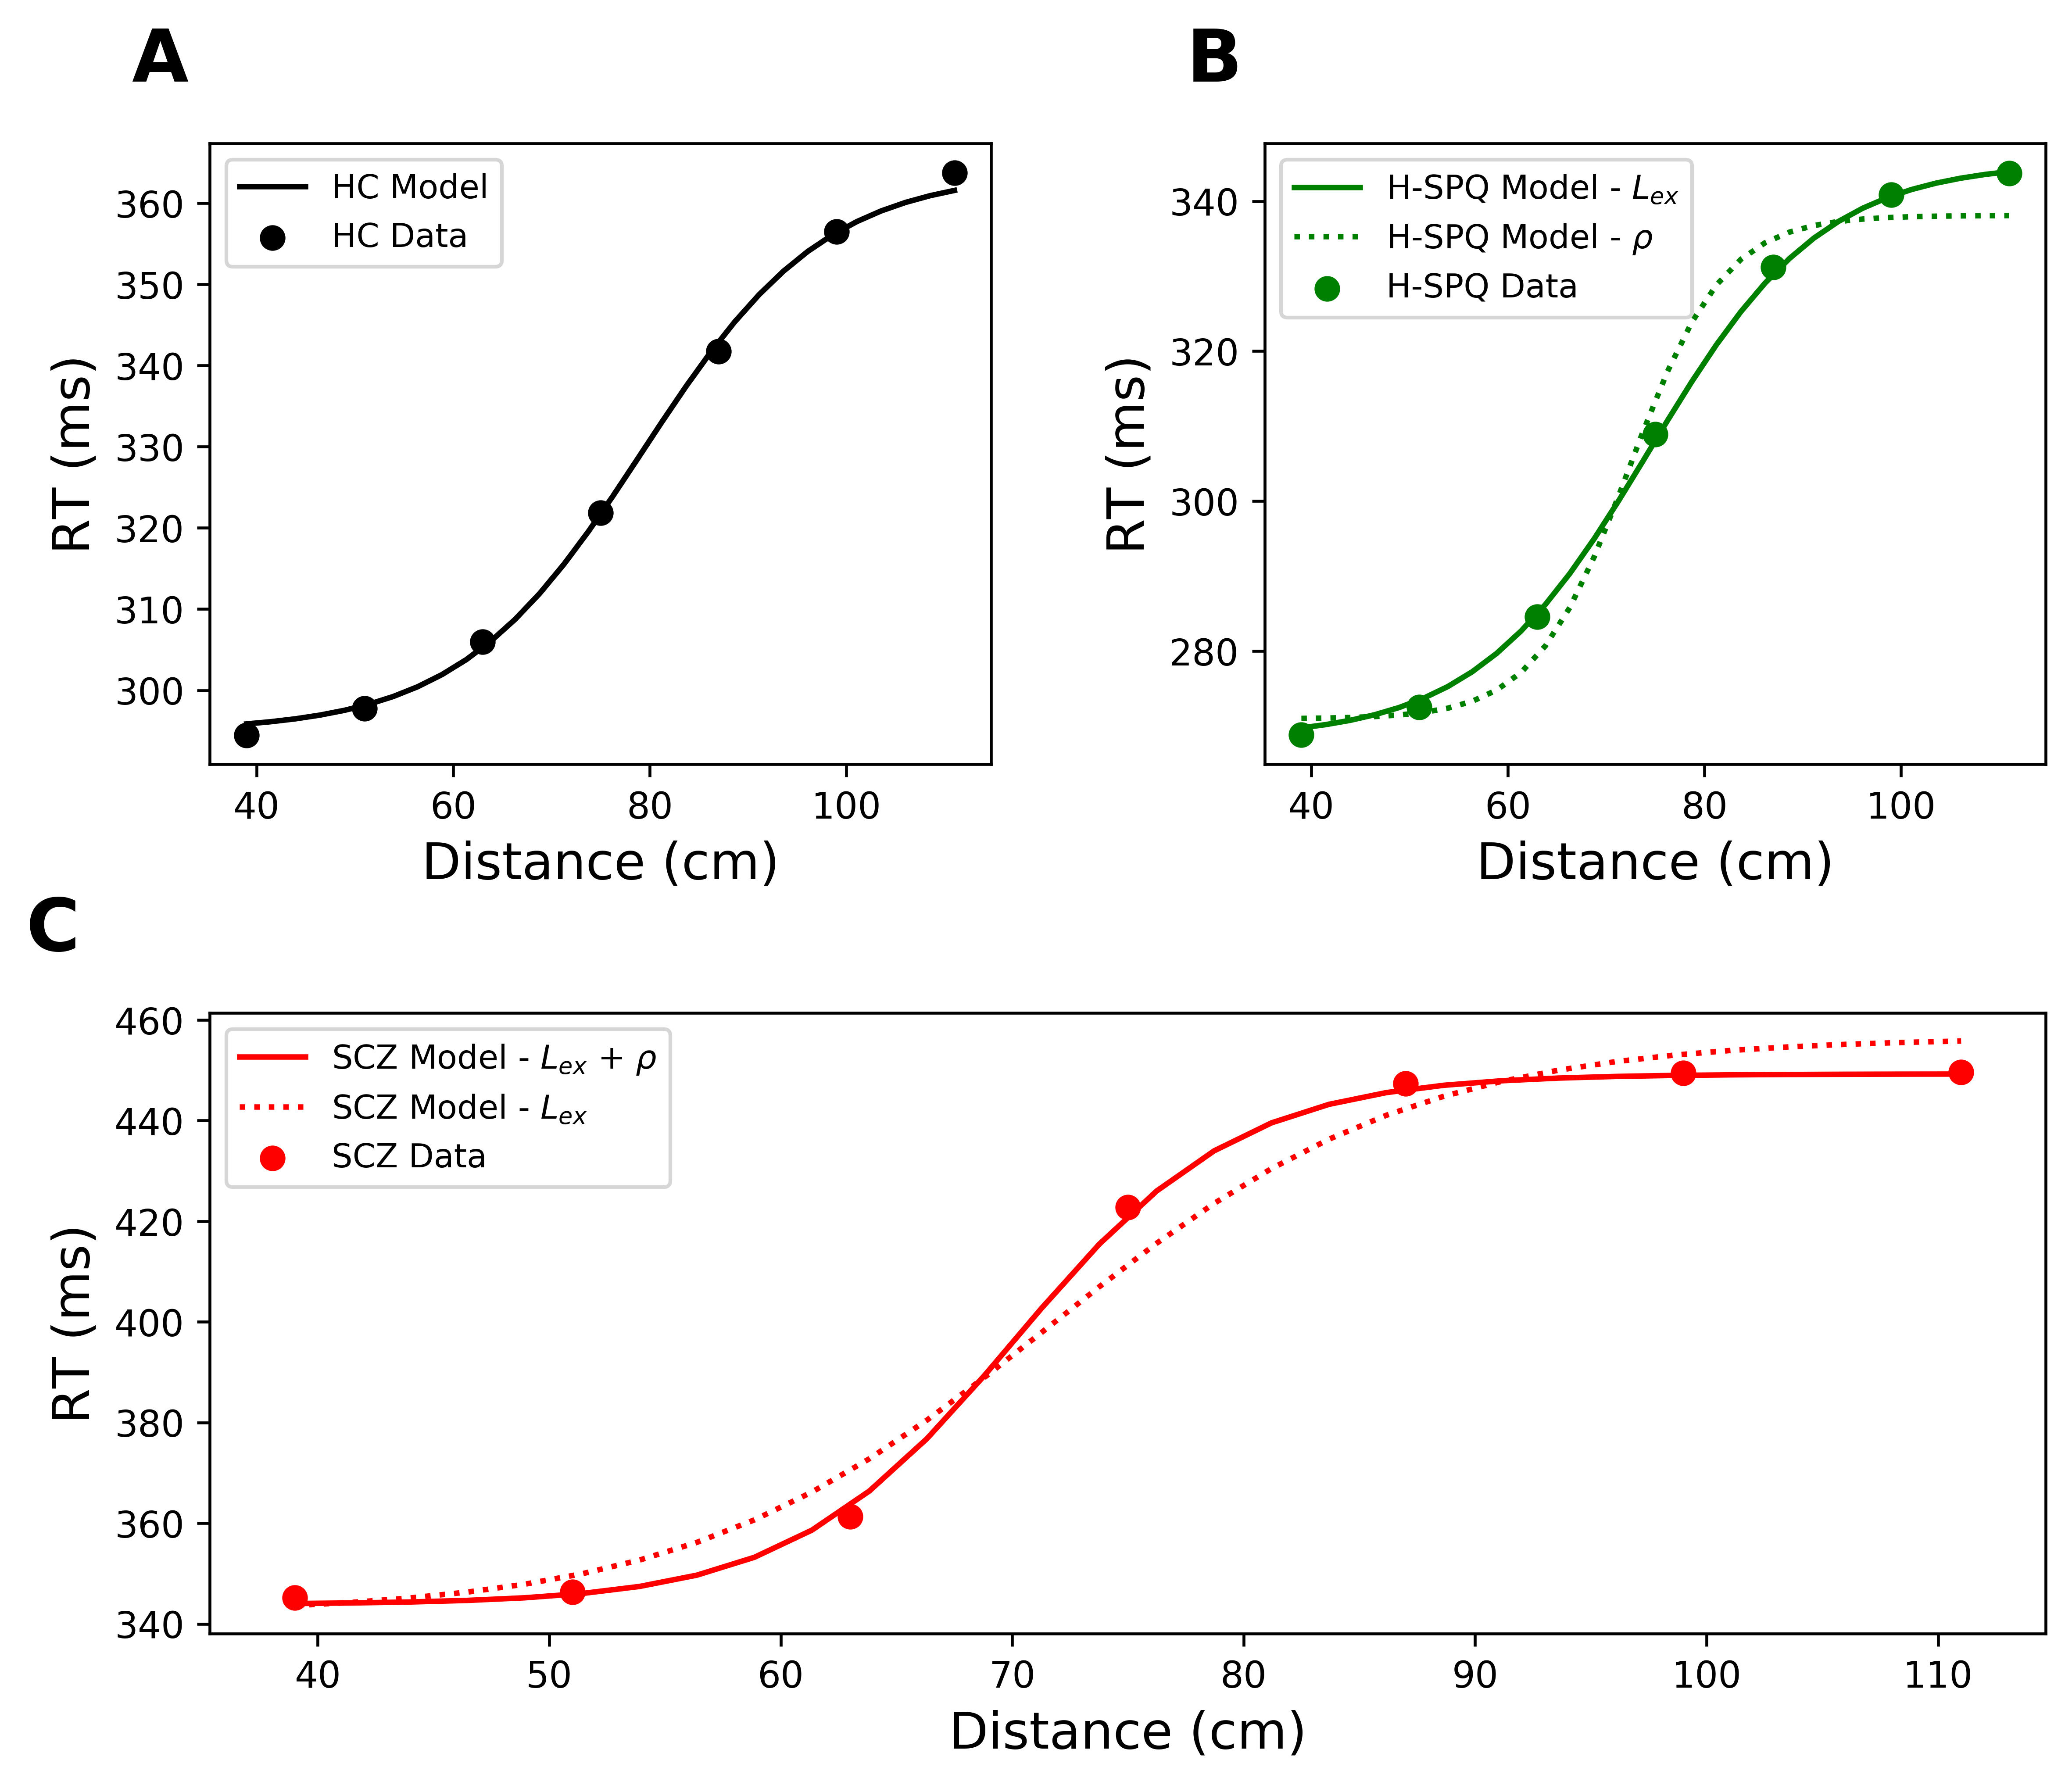

In [5]:
fig = plt.figure(figsize=(9, 7.5), dpi=600)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.plot(a_distances_exp, hc[0], label="HC Model", color="k")
ax1.scatter(a_distances, hc[1], label="HC Data", color="k")
ax1.set_ylabel("RT (ms)", size=14)
ax1.set_xlabel("Distance (cm)", size=14)
ax1.legend(prop={"size": 9})
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2.plot(a_distances_exp, spq_lex[0], label="H-SPQ Model - $L_{ex}$", color="g")
ax2.plot(a_distances_exp, spq_pr[0], ":", label="H-SPQ Model - " + r"$\rho$", color="g")
ax2.scatter(a_distances, spq_lex[1], label="H-SPQ Data", color="g")
ax2.set_ylabel("RT (ms)", size=14)
ax2.set_xlabel("Distance (cm)", size=14)
ax2.legend(prop={"size": 9})
ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

ax3.plot(
    a_distances_exp,
    scz_lex_pr[0],
    label="SCZ Model - $L_{ex}$ + " + r"$\rho$",
    color="r",
)
ax3.plot(a_distances_exp, scz_lex[0], ":", label="SCZ Model - $L_{ex}$", color="r")
# ax3.plot(a_distances_exp,scz_pr[0],'-.',label = 'SCZ Model - '+r'$\rho$',color='r')
ax3.scatter(a_distances, scz_lex_pr[1], label="SCZ Data", color="r")
ax3.set_ylabel("RT (ms)", size=14)
ax3.set_xlabel("Distance (cm)", size=14)
ax3.legend(prop={"size": 9})
ax3.text(
    -0.1,
    1.1,
    string.ascii_uppercase[2],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

fig.subplots_adjust(wspace=0.35, hspace=0.4)
# fig.savefig('Results/Figure3.eps', bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


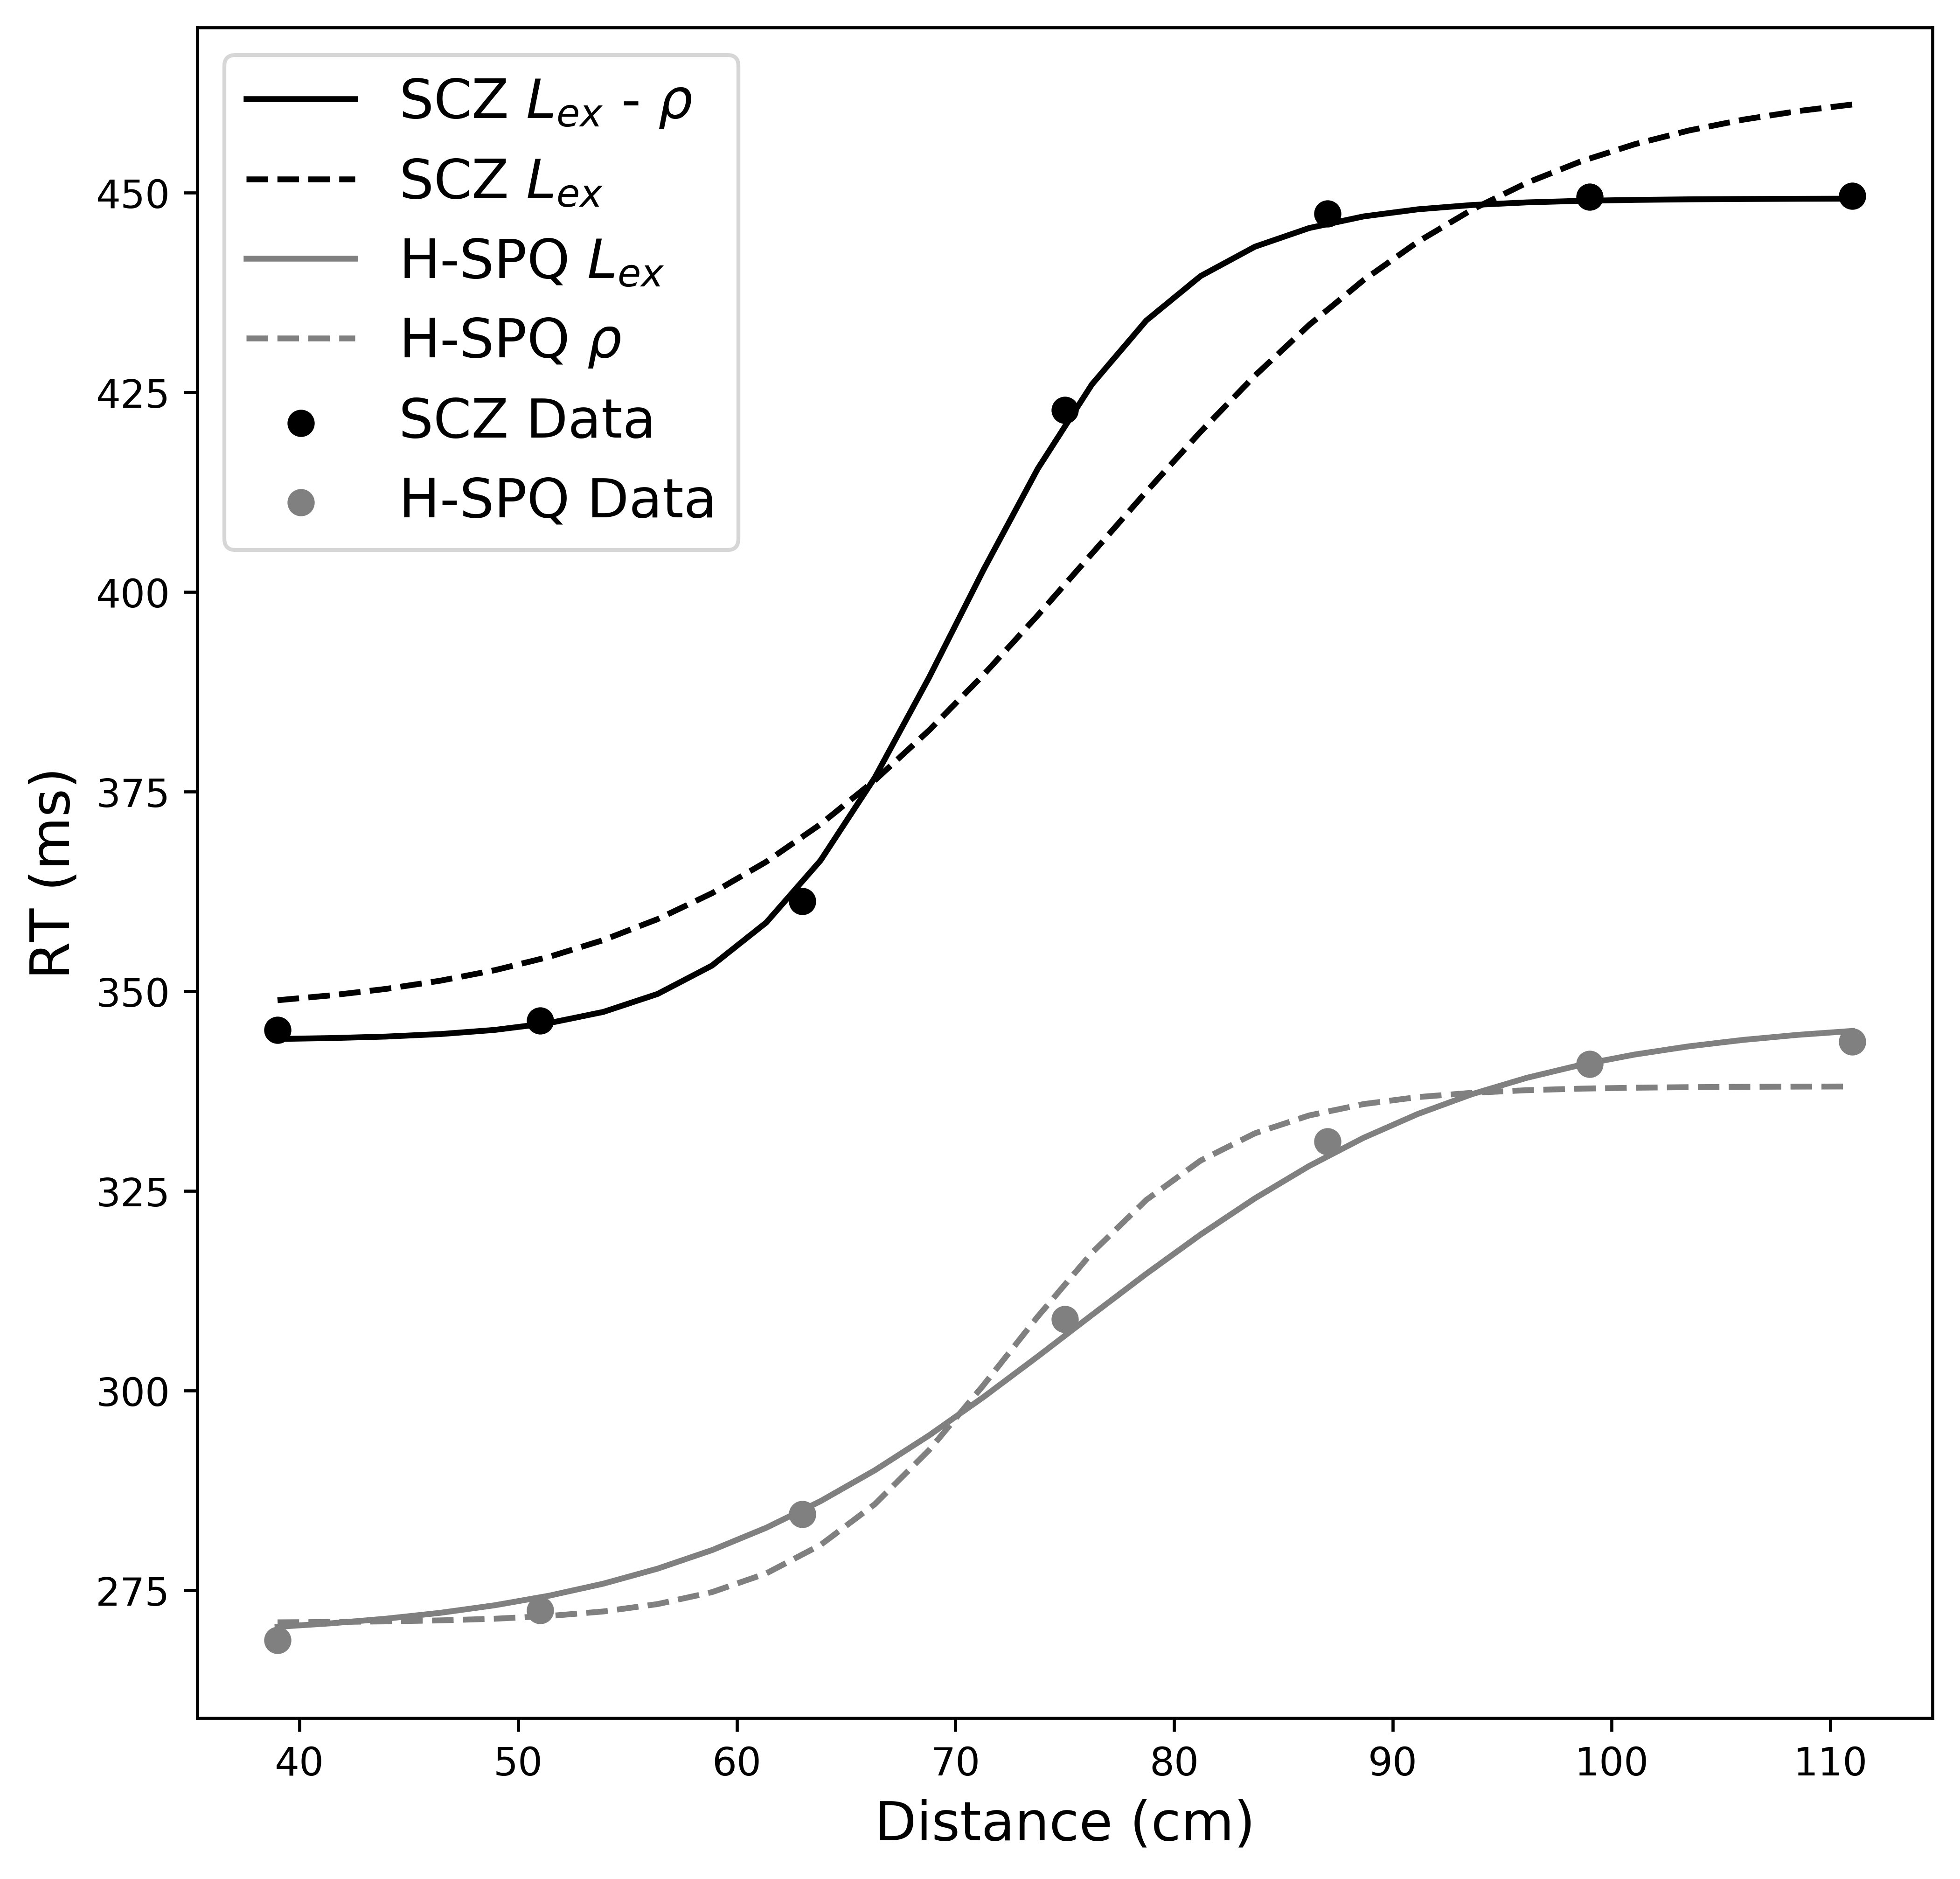

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8), dpi=600, sharex=True)

ax1.plot(a_distances_exp, scz_lex_pr[0], label="SCZ $L_{ex}$ - " + r"$\rho$", color="0")
ax1.plot(a_distances_exp, scz_lex[0], "--", label="SCZ $L_{ex}$", color="0")
ax1.scatter(a_distances, scz_lex_pr[1], label="SCZ Data", color="0")

ax1.plot(a_distances_exp, spq_lex[0], label="H-SPQ $L_{ex}$", color="0.5")
ax1.plot(a_distances_exp, spq_pr[0], "--", label="H-SPQ " + r"$\rho$", color="0.5")
ax1.scatter(a_distances, spq_lex[1], label="H-SPQ Data", color="0.5")

ax1.set_ylabel("RT (ms)", size=14)
ax1.set_xlabel("Distance (cm)", size=14)
ax1.legend(prop={"size": 14})

plt.subplots_adjust(hspace=0.0)
fig.savefig("Results/FIG3.eps", bbox_inches="tight", format="eps")
fig.savefig("Results/FIG3.png", bbox_inches="tight")

In [2]:
## Predictions
# Tactile discrimination and Social impairment
from mpl_toolkits.axes_grid1 import make_axes_locatable

hcZTs = np.load("hc_discrimination.npy")
sczZTs = np.load("scz_discrimination.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


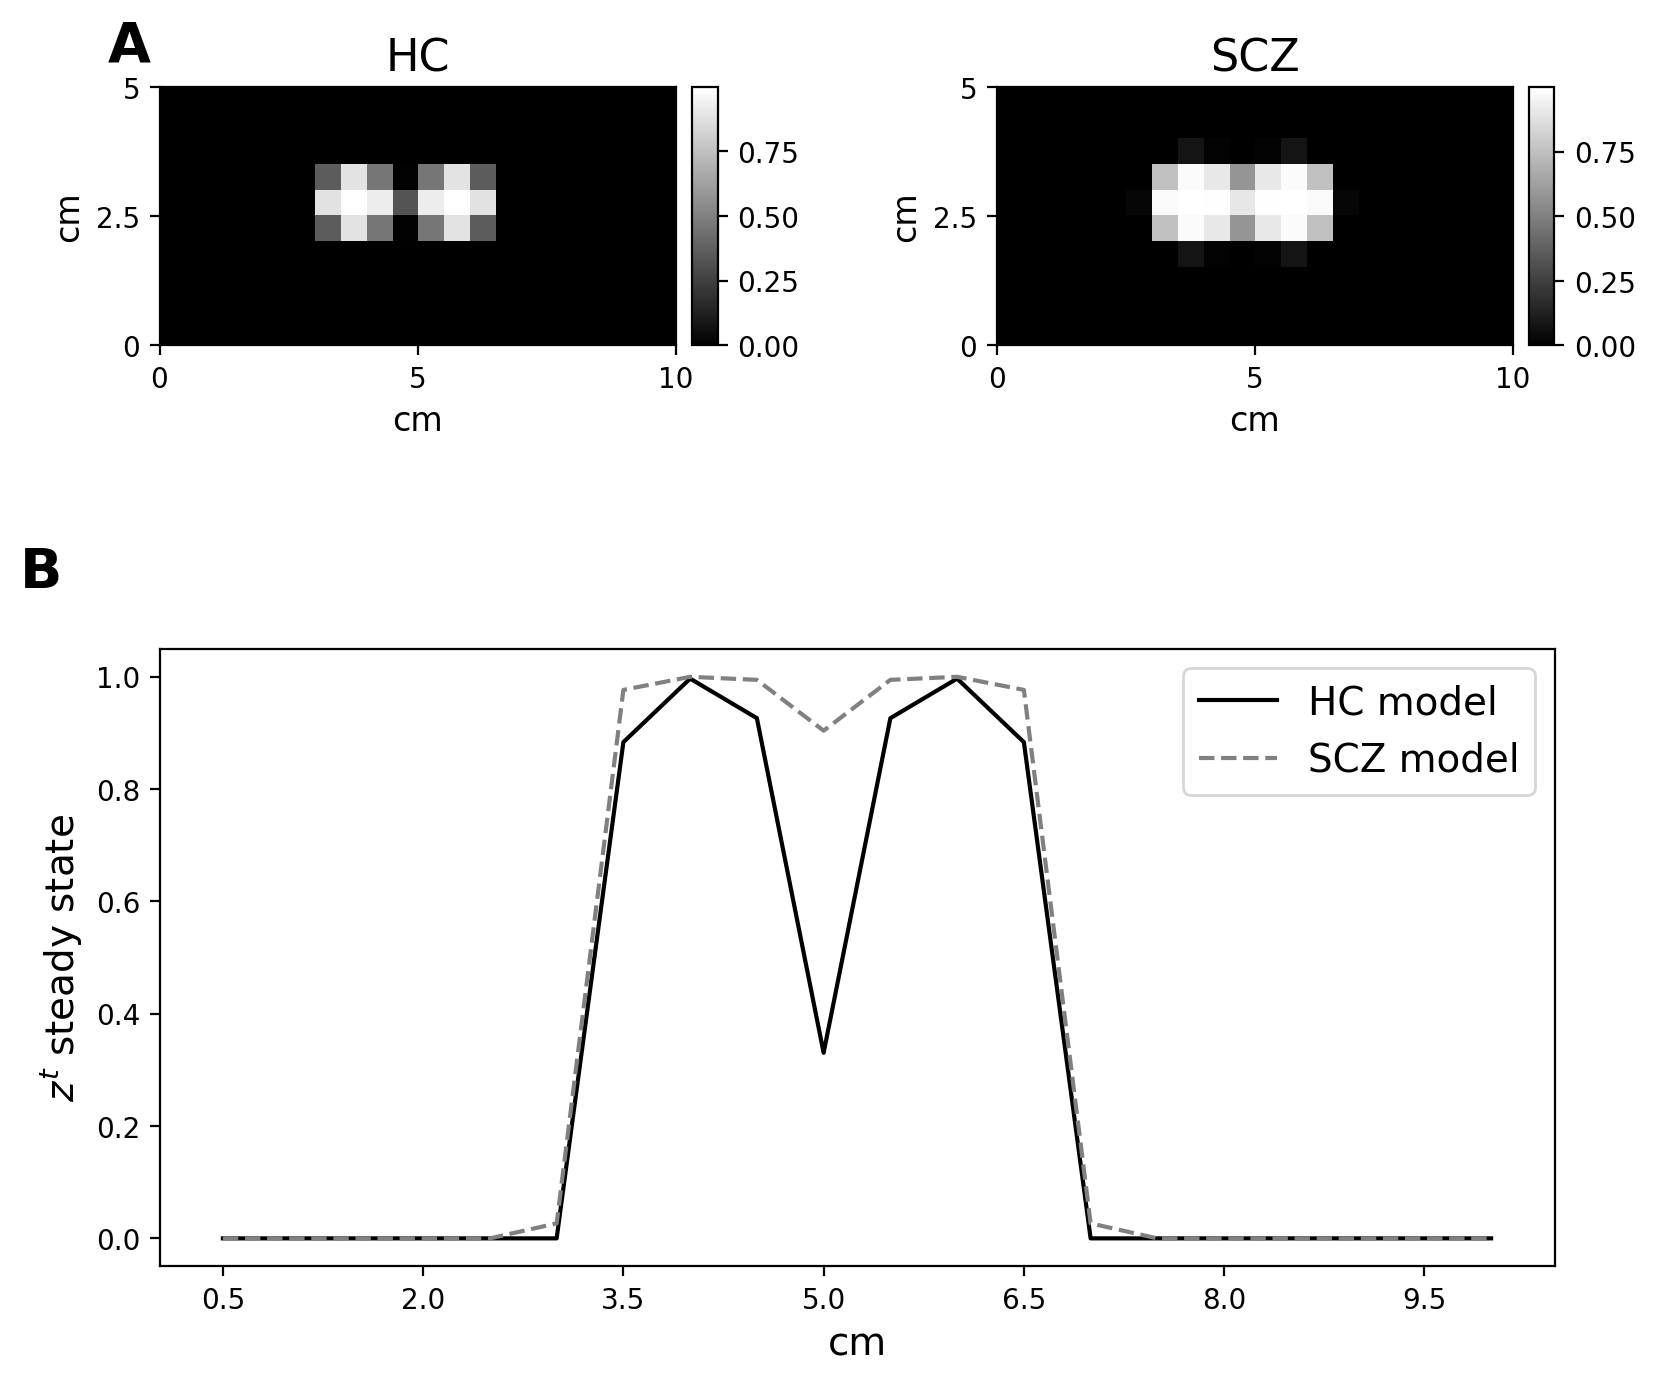

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), dpi=200)

ax1 = plt.subplot(221)
im1 = ax1.imshow(hcZTs.transpose(), cmap="gray")
ax1.set_title("HC", size=16)
ax1.set_ylabel("cm", size=12)
ax1.set_xlabel("cm", size=12)
ax1.set_xticks(np.arange(-0.5, 21, 10))
ax1.set_yticks(np.arange(-0.5, 11, 5))
ax1.set_xticklabels([0, 5, 10])
ax1.set_yticklabels([0, 2.5, 5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im1, cax=cax)
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(222)
im2 = ax2.imshow(sczZTs.transpose(), cmap="gray")
ax2.set_title("SCZ", size=16)
ax2.set_ylabel("cm", size=12)
ax2.set_xlabel("cm", size=12)
ax2.set_xticks(np.arange(-0.5, 21, 10))
ax2.set_yticks(np.arange(-0.5, 11, 5))
ax2.set_xticklabels([0, 5, 10])
ax2.set_yticklabels([0, 2.5, 5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im2, cax=cax)

ax3 = plt.subplot(212)
ax3.plot(hcZTs[:, 4], color="0", label="HC model")
ax3.plot(sczZTs[:, 4], "--", color=".5", label="SCZ model")
ax3.legend(prop={"size": 14})
ax3.set_ylabel("$z^{t}$ steady state", size=14)
ax3.set_xlabel("cm", size=14)
ax3.set_xticks(np.arange(0, 21, 3))
ax3.set_xticklabels(np.arange(0.5, 10.5, 1.5))
ax3.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

fig.subplots_adjust(wspace=0.5)

fig.savefig("Results/FIG4.eps", bbox_inches="tight", format="eps")
fig.savefig("Results/FIG4.png", bbox_inches="tight")